<a href="https://colab.research.google.com/github/TPV7/Heartbeatiot/blob/main/PranavT_Criticalpath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import tensorflow_probability as tfp
tfd=tfp.distributions

tasksDF=pd.read_csv('/content/drive/MyDrive/PERT-CPM.csv')
taskNames=tasksDF['tasks']

simulationDF=pd.DataFrame(columns=taskNames)

print(simulationDF.columns)

for index, task in tasksDF.iterrows():
  dist=tfd.PERT(low=task['best'], peak=task['mostL'], high=task['worst'],temperature=4)
  simulationDF[task['tasks']]=dist.sample(1000)

print(simulationDF)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'EOP'], dtype='object', name='tasks')
tasks         A         B         C         D         E         F         G  \
0      7.411103  5.332160  3.223660  2.911846  5.708150  2.147785  4.321253   
1      7.863970  3.535453  2.590695  2.962372  7.270862  2.543204  6.956724   
2      6.679156  4.815428  2.690360  2.798932  6.465163  2.197039  3.529675   
3      7.672576  5.448812  4.179956  2.530532  6.753643  4.493330  3.933589   
4      5.836446  5.169114  3.646755  2.737541  7.479835  1.864038  3.715159   
..          ...       ...       ...       ...       ...       ...       ...   
995    6.614042  4.160039  3.373866  2.666413  5.696750  3.835534  3.816758   
996    6.823412  4.990746  3.066080  2.860252  7.433525  6.331847  3.169265   
997    6.516042  5.620953  3.229084  2.382573  5.652749  2.372343  6.119675   
998    5.151677  3.269340  2.673272  2.766752  6.613199  1.048803  7.341809   
999    6.514174  5.454641  3.489990 

# New Section

In [22]:
paths=['ADEJ','BCDEJ','BCFGJ','BCFHJ','BI']
pathsDF=pd.DataFrame(columns=paths)

ADEJ = []
BCDEJ=[]
BCFGJ=[]
BCFHJ=[]
BI=[]



for index,row in simulationDF.iterrows():
  BCDEJ.append(row['B']+row['C']+row['D']+row['E']+row['J'])
  BCFGJ.append(row['B']+row['C']+row['F']+row['G']+row['J'])
  BCFHJ.append(row['B']+row['C']+row['F']+row['H']+row['J'])
  BI.append(row['B']+row['I'])
  ADEJ.append(row['A']+row['D']+row['E'] + row['J'])
  


pathsDF['ADEJ']=ADEJ
pathsDF['BCDEJ']=BCDEJ
pathsDF['BCFGJ']=BCFGJ
pathsDF['BCFHJ']=BCFHJ
pathsDF['BI']=BI
print(pathsDF)






          ADEJ      BCDEJ      BCFGJ      BCFHJ         BI
0    15.165156  17.905378  15.166199  13.207450  12.432415
1    17.546465  17.410503  18.489536  13.829329  10.967098
2    19.789267  20.036526  19.368935  19.943403  11.978834
3    17.939081  19.947428  20.673395  21.468742  15.634327
4    19.696617  21.082348  18.657732  20.872355  15.562619
..         ...        ...        ...        ...        ...
995  19.296997  20.399509  15.985999  13.797058  14.858324
996  19.723719  21.207087  17.995876  18.733191  19.665136
997  19.871216  21.233253  24.587688  18.130178  25.411713
998  17.551376  18.471207  19.887781  18.401735  16.943808
999  14.028718  18.274445  19.204037  14.727859  14.718645

[1000 rows x 5 columns]


In [24]:
pathsDF['Critical Path'] = pathsDF.idxmax(axis = 1)

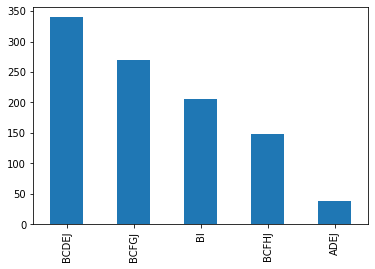

In [27]:
pathsDF['Critical Path'].value_counts().plot.bar()